# Ultimate Technologies Inc. Data Science Challenge 

## Springboard take home assignment

### John Burt


### Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
    - a. how you will implement the experiment    
    - b. what statistical test(s) you will conduct to verify the significance of the observation
    - c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

### Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [172]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import json

In [176]:
logins = pd.read_json('logins.json')
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.sort_values(by='login_time',inplace=True)

print('reading logins.json:')
logins.head()

reading logins.json:


,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


# Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Analysis:

#### (See figures below)


In [73]:
# create new df of login counts every 15 minutes
logins['count'] = [1]*logins.shape[0]
log15 = logins.set_index('login_time').resample('15min')['count'].count().reset_index()

print('logins data details:\n')
print('start time =',log15['login_time'].min())
print('end time =',log15['login_time'].max())
print()
print(log15['count'].describe())


logins data details:

start time = 1970-01-01 20:00:00
end time = 1970-04-13 18:45:00

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
Name: count, dtype: float64


### Figure 1 - Login frequencies over 15 minute intervals for all days:  
Looking at login rate across the entire interval, it's clear that there is a lot of variability, and there are cycles of high/low login rates. 

### Figure 2 Login frequencies over 15 minute intervals for first 7 days: 
The cycles appear to repeat daily, but there is a repeating pattern within days, and across days.

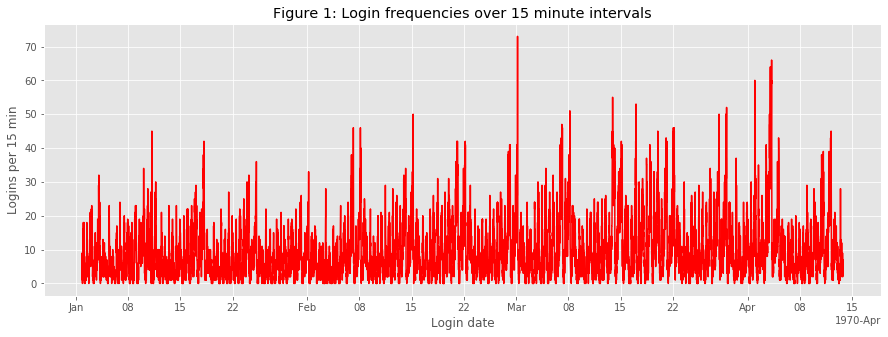

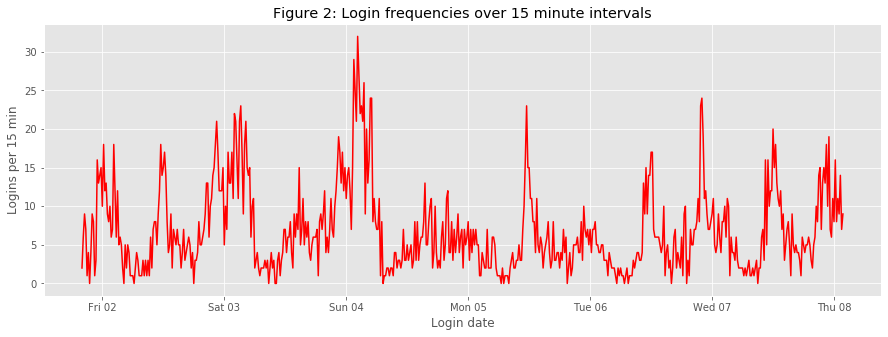

In [112]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(figsize=[15,5])
ax.set_title("Figure 1: Login frequencies over 15 minute intervals")
# ax.bar(log15['login_time'], log15['count'],
#        color="r", align="center")
ax.plot(log15['login_time'], log15['count'],'r-')
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Login date')
ax.set_ylabel('Logins per 15 min');

numsamps = 600
fig, ax = plt.subplots(figsize=[15,5])
ax.set_title("Figure 2: Login frequencies over 15 minute intervals")
# ax.bar(log15['login_time'], log15['count'],
#        color="r", align="center")
ax.plot(log15['login_time'].iloc[:numsamps], log15['count'].iloc[:numsamps],'r-')
locator = mdates.AutoDateLocator(minticks=5, maxticks=10)
# formatter = mdates.ConciseDateFormatter(locator)
formatter = DateFormatter("%a %d")
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Login date')
ax.set_ylabel('Logins per 15 min');

### Figure 3 - Mean login rate per 15 min over week days: 
Peak mean login rates are on the weekend, with Saturday highest. Lowest rates are on Monday. There is a lot of variability however, particularly mid-week. 


### Figure 4 - Mean login rate per 15 min over 24 hours: 
There are some interesting patterns looking at login rates over hours. There are three distinct peaks (1AM, 11AM and 10PM), and two distinct toughs (7-8AM and 5PM). I would speculate that the login peaks represent three distinct times that people are likely to use the service: morning commute pickup (10PM), bar calls (1AM), evening commute pickup (11AM).

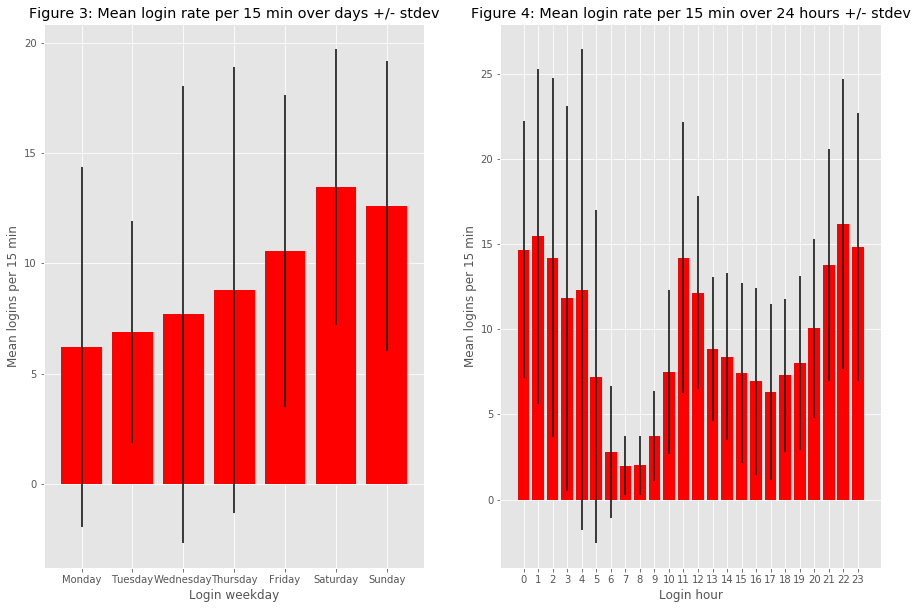

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[15,10])

# plot mean login rate by day 
log15['dayname'] = log15['login_time'].dt.day_name()
log15['daynum'] = log15['login_time'].dt.dayofweek
daylogmean = log15.groupby(by='dayname').mean().sort_values(by='daynum').reset_index()
daylogstd = log15.groupby(by='dayname').std().sort_values(by='daynum').reset_index()
ax[0].set_title("Figure 3: Mean login rate per 15 min over week days +/- stdev")
ax[0].bar(daylogmean['dayname'], daylogmean['count'],yerr=[daylogstd['count'],daylogstd['count']],
       color="r", align="center")
ax[0].set_xlabel('Login weekday')
ax[0].set_ylabel('Mean logins per 15 min');

# plot mean login rate by hour 
log15['hour'] = log15['login_time'].dt.hour
hrlogmean = log15.groupby(by='hour').mean().reset_index()
hrlogstd = log15.groupby(by='hour').std().reset_index()
ax[1].set_title("Figure 4: Mean login rate per 15 min over 24 hours +/- stdev")
ax[1].bar(hrlogmean['hour'], hrlogmean['count'],yerr=[hrlogstd['count'],hrlogstd['count']],
       color="r", align="center")
ax[1].set_xticks(range(24))
ax[1].set_xlabel('Login hour')
ax[1].set_ylabel('Mean logins per 15 min');



### Figure 5 - Mean hourly login rate weekdays vs weekend:
Comparing hourly login rates up by weekday vs weekend helps to explain the variability seen in the first figures: there is a distinctly different pattern of activity during the week vs the weekend. During the week, logins peak at around 10PM and 11AM, presumably the times when workers are at home or on break and need to set up their rides. On the weekends, there are peaks at around 3PM, 10PM and 4AM, persumably periods when people are out doing things they can only do on the weekends, such as shopping or going to clubs

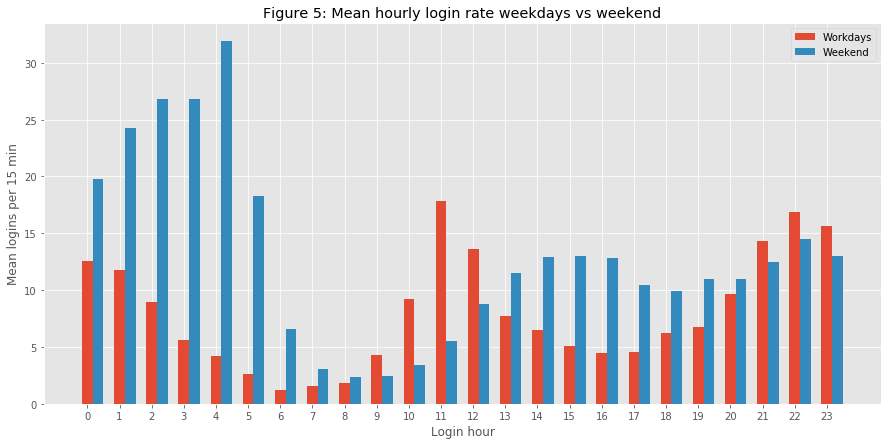

In [173]:
# list days in preferred order
workdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Saturday', 'Sunday']

# get mean hourly login rates for weekdays and weekends
mf_hrday = log15.set_index('dayname').loc[workdays].groupby(by='hour').mean().reset_index()
ss_hrday = log15.set_index('dayname').loc[weekend].groupby(by='hour').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,7])

width = 1/3

ax.bar(np.array(range(24)), mf_hrday['count'], 
       width=width, align="center", label='Workdays')

ax.bar(np.array(range(24))+width, ss_hrday['count'], 
       width=width, align="center", label='Weekend')
    
ax.set_title("Figure 5: Mean hourly login rate weekdays vs weekend")
ax.set_xlabel('Login hour')
ax.set_ylabel('Mean logins per 15 min');
ax.set_xticks(range(24))
ax.legend();
  

# Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

## Question 1. 
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### Answer:

There are several measures that could be taken to track success. The most obvious and recommended method would be to compare the rate of tolls paid by drivers before and after the experiment. If the number of tolls increases, then this would be evidence that the program is working to motivate drivers to use the bridge. You could also measure the rate of drivers crossing the bridge (i.e., rides starting in one city and ending in the other). Excluding these direct measurements, you could monitor driver activity rhythms in both cities: if the toll experiment is effective, you should see the activity patterns become more similar.

<br>
<br>

## Question 2. 
Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
- a. how you will implement the experiment    
- b. what statistical test(s) you will conduct to verify the significance of the observation
- c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
### Answer:

Using number of tolls as your measure: 
- a. Divers would be required to log toll rides (or this could be acquired via GPS telemetry). The experiment would have a before paid-tolls period and a period of paid-tolls (say, one month before and one month paid-tolls).
- b. A simple Chi-square test of toll bridge use frequencies before vs after would suffice to indicate whether there was a significant increase in inter-city rides. More complicated descriptive analyses would be possible. For example, you could look at how the paid-toll manipulation affects overall ridership and fee profits, etc.
- c. If the use of the toll bridge significantly increases, then I would recommend that the OP team continue to research the program. The next question to ask would be: does the increase in inter-city fares make enough profit to offset the toll fees and administration costs? A fairly simple cost-benefit analysis using collected data would answer that.
    

# Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

## Answer:

My approach will be as follows:

- Examine and clean dataset.
- Create a 'retained' column based on above criteria. This will be my training label.
- Generate a feature dataframe by converting and combining all relevant data columns as numeric values.
- Tune an XGBoost model to the data.
- Cross-validate the model
- Discusion and insights.

In [209]:
# NOTE: pd.read_json gives error (prob mising data), so do this instead
with open('ultimate_data_challenge.json') as json_file:
    users = pd.DataFrame(json.load(json_file))
print('reading ultimate_data_challenge.json:')

print('users.shape =',users.shape)
users.head()

reading ultimate_data_challenge.json:
users.shape = (50000, 12)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Clean and examine the dataset

In [210]:
# convert date fields to datetime
users['signup_date'] = pd.to_datetime(users['signup_date'])
users['last_trip_date'] = pd.to_datetime(users['last_trip_date'])

print(users.describe())

# drop rows with NaNa
beforesize = users.shape[0]
users.dropna(inplace=True)

print('\nSize after dropping rows with NaNs:',users.shape[0], 
      ' #dropped:',beforesize-users.shape[0])

       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
count            50000.000000          41878.000000  50000.000000   
mean                 2.278200              4.601559      1.074764   
std                  3.792684              0.617338      0.222336   
min                  0.000000              1.000000      1.000000   
25%                  0.000000              4.300000      1.000000   
50%                  1.000000              4.900000      1.000000   
75%                  3.000000              5.000000      1.050000   
max                125.000000              5.000000      8.000000   

          surge_pct   weekday_pct      avg_dist  avg_rating_by_driver  
count  50000.000000  50000.000000  50000.000000          49799.000000  
mean       8.849536     60.926084      5.796827              4.778158  
std       19.958811     37.081503      5.707357              0.446652  
min        0.000000      0.000000      0.000000              1.000000  
25%        0.00000

## Create a 'retained' column based on criteria.

>We consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

This will be used as my training label.

In [218]:
# Get the most recent last trip date. 
# Since the docs don't say when the data was pulled, I'll use this as my "pull date" 
#   for determining retention.
pull_date = users['last_trip_date'].max()

print('last trip date:',pull_date)

# calculate retention
y = (pull_date - users['last_trip_date'] <= timedelta(days=30)).astype(int)

print('# retained =',y.sum(), '  percent of samples =',
      np.round(100*(y.sum()/users.shape[0])))

last trip date: 2014-07-01 00:00:00
# retained = 17035   percent of samples = 41.0


## Create features

In [212]:

# first, I'll grab the numeric features that don't need conversion
X = users[ ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
            'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'] ]

# convert ultimate_black_user to numeric
X['ultimate_black_user'] = users['ultimate_black_user'].astype(int)

# convert city to one hot
X = pd.concat([X, pd.get_dummies(users['city'], prefix='city')], axis=1)

# convert phone to one hot
X = pd.concat([X, pd.get_dummies(users['phone'], prefix='phone')], axis=1)


## Cross-validate the model

In [223]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# create model instance
clf = XGBClassifier()

# get cross val score
scores = cross_val_score(clf, X, y, cv=5, scoring='balanced_accuracy')

print('Cross-validate model:')
print('CV scores = ', ['%1.2f,'%(s) for s in scores])
print('mean score = %1.2f'%(np.mean(scores)))


Cross-validate model:
CV scores =  ['0.77,', '0.77,', '0.77,', '0.77,', '0.77,']
mean score = 0.77


## Print and plot the most important features

Feature ranking:
1. (0.182) city_King's Landing
2. (0.160) avg_rating_by_driver
3. (0.136) surge_pct
4. (0.133) phone_Android
5. (0.131) ultimate_black_user
6. (0.095) weekday_pct
7. (0.057) city_Astapor
8. (0.041) avg_rating_of_driver
9. (0.025) trips_in_first_30_days
10. (0.018) avg_dist


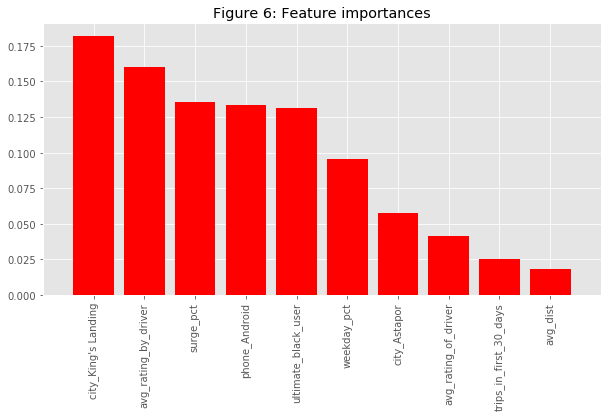

In [246]:
# re-fit to entire dataset
clf.fit(X, y);

names = X.columns
numimportant = 10

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(numimportant):
    print("%d. (%1.3f) %s" % (
        f + 1, 
        importances[indices[f]],
        names[indices[f]]
         ))

# Plot the feature importances of the forest
plt.figure(figsize=[10,5])
plt.title("Figure 6: Feature importances")
plt.bar(range(numimportant), importances[indices[:numimportant]],
       color="r", align="center")
plt.xticks(range(numimportant), names[indices[:numimportant]], rotation=90)
plt.xlim([-1, numimportant]);



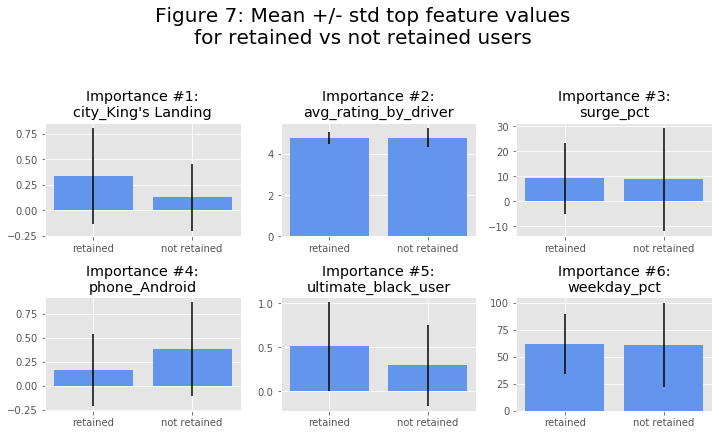

In [249]:
n_top = 6
# plot the mean values of the top n important features
plt.figure(figsize=[10,5])
for i, fname in enumerate(names[indices[:numimportant]][:n_top]):
    plt.subplot(2, 3, i+1)
    meanyes = X[fname][y==1].mean()
    meanno = X[fname][y==0].mean()
    stdyes = X[fname][y==1].std()
    stdno = X[fname][y==0].std()
    plt.title("Importance #%d:\n%s"%(i+1,fname))
    plt.bar(['retained','not retained'], [meanyes,meanno], yerr=[stdyes,stdno],
            color="cornflowerblue", align="center")
#     plt.tight_layout()

plt.suptitle('Figure 7: Mean +/- std top feature values\nfor retained vs not retained users',
            y=1.2, fontsize=20)
plt.tight_layout()


## Discusion and insights

2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longtermrider retention (again, a few sentences will suffice).

## Answer:
Model selection: for this task I chose to use XGBoost classifier, because it is reliably the best or near-best performer, and it is less sensitive to non-normal data. XGBoost default parameters are rarely improved much by hyper parameter tuning. That means I can be reasonably confident that the result from this "out of the box" model is at least decent enough for a first-pass analysis. If I were to do a full analysis, I would additionally:
- Examine the numeric feature distributions and transform them to normalize if necessary. 
- Test several different classifiers, including logistic regression and random forest. 
- Use a hyperparameter optimization tool like hyperopt to ensure best model performance.

The default XGBoost model performed reasonably well, with a balanced accuracy of 77%. 

The most important feature was that retained users were from Kings Landing. I'd suggest that Ultimate look at factors that differentiate Kings Landing users from others, and also consider increasing advertizing in that city. 
